--- Closed-form Solution ---
Intercept: 3.1052, Slope: 3.9844

--- Gradient Descent Solution ---
Intercept: 3.1052, Slope: 3.9844


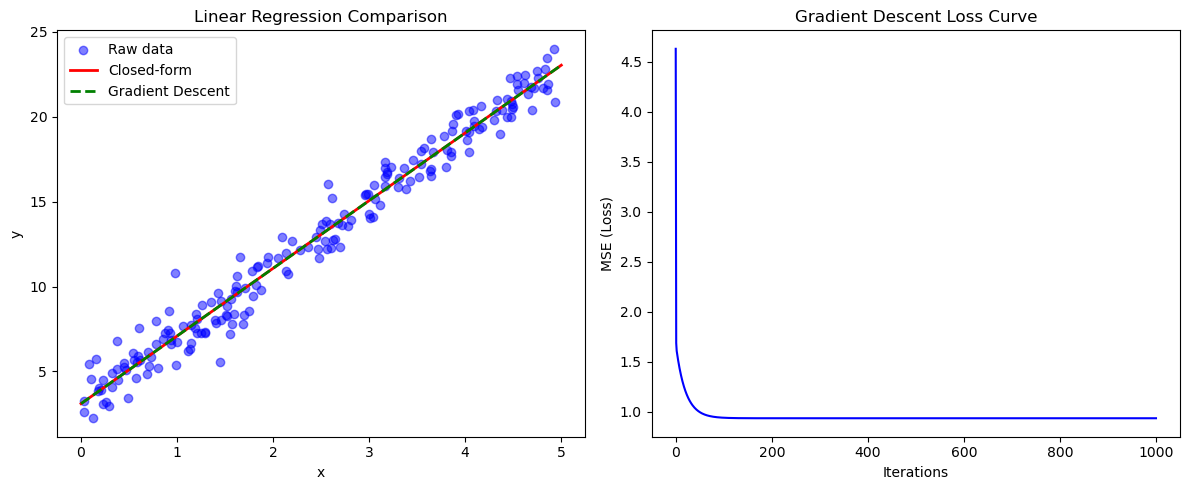

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Dataset Generation
np.random.seed(42)
X_raw = 5 * np.random.rand(200, 1)  # 200 samples with x in [0, 5]
epsilon = np.random.randn(200, 1)    # Gaussian noise 
y = 3 + 4 * X_raw + epsilon          # y = 3 + 4x + noise

# Add a bias column of 1's to X
X_b = np.c_[np.ones((200, 1)), X_raw]

# 2. Closed-form solution (Normal Equation)
# Equation: theta = (X^T * X)^-1 * X^T * y
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
intercept_cf, slope_cf = theta_best[0][0], theta_best[1][0]

print("--- Closed-form Solution ---")
print(f"Intercept: {intercept_cf:.4f}, Slope: {slope_cf:.4f}\n")

# 3. Gradient Descent Implementation
eta = 0.05            # Learning rate
n_iterations = 1000   # Iterations
m = 200               # Number of samples
theta = np.zeros((2, 1))  # Initialize theta = [0, 0]
loss_history = []

for iteration in range(n_iterations):
    # Calculate Gradient for MSE
    # Formula: (2/m) * X^T * (X*theta - y)
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

    # Calculate MSE for loss curve
    loss = np.mean((X_b.dot(theta) - y)**2)
    loss_history.append(loss)

intercept_gd, slope_gd = theta[0][0], theta[1][0]
print("--- Gradient Descent Solution ---")
print(f"Intercept: {intercept_gd:.4f}, Slope: {slope_gd:.4f}")

# 4. Visualization - Plots

# Plot 1: Dataset and Fitted Lines
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_raw, y, color='blue', alpha=0.5, label='Raw data')
X_new = np.array([[0], [5]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict_cf = X_new_b.dot(theta_best)
y_predict_gd = X_new_b.dot(theta)

plt.plot(X_new, y_predict_cf, "r-", linewidth=2, label="Closed-form")
plt.plot(X_new, y_predict_gd, "g--", linewidth=2, label="Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Comparison")

# Plot 2: Loss Curve
plt.subplot(1, 2, 2)
plt.plot(range(n_iterations), loss_history, "b-")
plt.xlabel("Iterations")
plt.ylabel("MSE (Loss)")
plt.title("Gradient Descent Loss Curve")
plt.tight_layout()
plt.show()